In [1]:
!pip install ultralytics
from ultralytics import YOLO

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# unzipping dataset
!cp "/content/MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip" "MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip"
!unzip "MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip"

cp: '/content/MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip' and 'MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip' are the same file
Archive:  MRI BRAIN TUMOR.v1-braintumorsample1.0.yolov8 (1).zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/Y11_jpg.rf.a2927aa6c18c3e171759794c652f7a94.jpg  
 extracting: test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg  
 extracting: test/images/Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg  
 extracting: test/images/Y25_jpg.rf.44dd79b8fc37ba37125a4aaded54ac7c.jpg  
 extracting: test/images/Y29_jpg.rf.307e980d22d7cea7aed340d4f0edc9bc.jpg  
 extracting: test/images/Y33_jpg.rf.f3e7bf77085ecd9dd6c9cfbc268b8fc0.jpg  
 extracting: test/images/Y35_jpg.rf.2708ac47796b51b380ca8f3cf8fcc821.jpg  
 extracting: test/images/Y49_JPG.rf.f5d86858ea33cd0f3b814c9705d731e5.jpg  
 extracting: test/images/Y53_j

In [4]:
#Training YOLOv8 on a custom dataset
!yolo task = detect mode = train model = yolov8n.pt data = /content/data.yaml epochs = 50 imgsz= 650 project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, patience=50, batch=16, imgsz=650, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Brain_Tumor/New_Results, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

In [8]:
 # Predicting using our custom trained YOLOv8 model
!yolo task = detect mode = predict model = /content/drive/MyDrive/Brain_Tumor/New_Results/train2/weights/best.pt source = /content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg  project = /content/drive/MyDrive/Brain_Tumor/New_Results

Ultralytics YOLOv8.0.145 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg: 672x672 1 YES-TUMOR, 12.6ms
Speed: 4.8ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (1, 3, 672, 672)
Results saved to /content/drive/MyDrive/Brain_Tumor/New_Results/predict


In [9]:
import cv2
import matplotlib.pyplot as plt

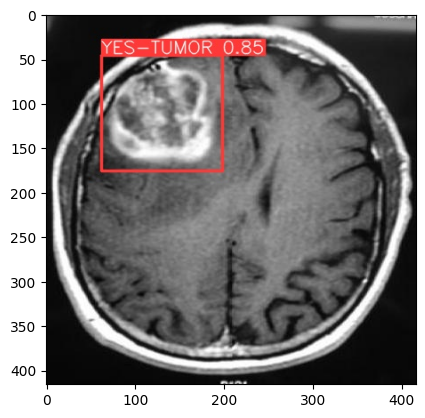

In [10]:
# Plotting the predicted image along with confidence
image = cv2.imread('/content/drive/MyDrive/Brain_Tumor/New_Results/predict/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [11]:
import cv2
import matplotlib.pyplot as plt

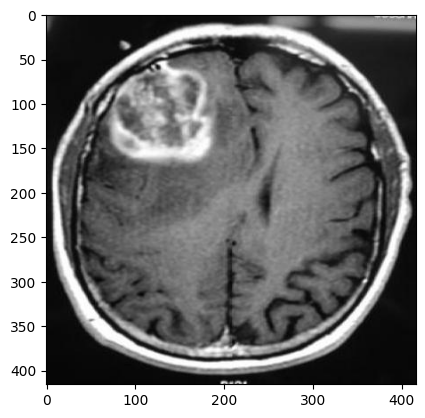

In [12]:
image = cv2.imread('/content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [14]:
## loading the custom trained YOLOv8m model
model = YOLO('/content/drive/MyDrive/Brain_Tumor/New_Results/train2/weights/best.pt')
# Perform inference
results = model('/content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg')
results


image 1/1 /content/test/images/Y15_jpg.rf.ef14d75b886fd9ce299d12ffe480c5e9.jpg: 672x672 1 YES-TUMOR, 8.6ms
Speed: 2.9ms preprocess, 8.6ms inference, 2.4ms postprocess per image at shape (1, 3, 672, 672)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'YES-TUMOR'}
 orig_img: array([[[103, 103, 103],
         [100, 100, 100],
         [ 95,  95,  95],
         ...,
         [125, 125, 125],
         [185, 185, 185],
         [231, 231, 231]],
 
        [[100, 100, 100],
         [ 97,  97,  97],
         [ 92,  92,  92],
         ...,
         [232, 232, 232],
         [243, 243, 243],
         [251, 251, 251]],
 
        [[ 96,  96,  96],
         [ 93,  93,  93],
         [ 88,  88,  88],
         ...,
         [173, 173, 173],
         [199, 199, 199],
         [236, 236, 236]],
 
        ...,
 
        [[  6,   6,   6],
         [  6,   6,   6],
         [  6,   6,   6],
         ...,
         [  7,   7,   7],
         [  7,   7,   7],
         [  7,   7,   7]],
 
        [[  6,   6,   6],
         [  6,   6,   6],
         [  6,   6,   6],
         ...,
         

In [15]:
result = results[0]
result.boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[ 62.4226,  46.5998, 198.3528, 176.9984,   0.8527,   0.0000]], device='cuda:0')
cls: tensor([0.], device='cuda:0')
conf: tensor([0.8527], device='cuda:0')
data: tensor([[ 62.4226,  46.5998, 198.3528, 176.9984,   0.8527,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[130.3877, 111.7991, 135.9302, 130.3986]], device='cuda:0')
xywhn: tensor([[0.3134, 0.2687, 0.3268, 0.3135]], device='cuda:0')
xyxy: tensor([[ 62.4226,  46.5998, 198.3528, 176.9984]], device='cuda:0')
xyxyn: tensor([[0.1501, 0.1120, 0.4768, 0.4255]], device='cuda:0')

In [16]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: YES-TUMOR
Coordinates: [62, 47, 198, 177]
Probability: 0.85
---


In [17]:
# defining custom functions for mask generation

In [18]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [19]:
# To make it easier for us to manage datasets, images and models we create a HOME constant.
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


##### Install Segment Anything Model (SAM) and other dependencies

In [20]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4kb93qqo
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4kb93qqo
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36588 sha256=243e4f0cc268a0b0a62bd17ddc75d3afa26580a7f6faafe0b710fa6d21edead3
  Stored in directory: /tmp/pip-ephem-wheel-cache-zu52jv4f/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [21]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00


##### Download SAM weights

In [22]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [23]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [24]:
!pip install supervision

In [25]:
import numpy as np
import torch
import cv2
import supervision as sv

## Generate Segmentation with Bounding Box

The `SamPredictor` class provides an easy interface to the model for prompting the model. It allows the user to first set an image using the `set_image` method, which calculates the necessary image embeddings. Then, prompts can be provided via the `predict` method to efficiently predict masks from those prompts. The model can take as input both point and box prompts, as well as masks from the previous iteration of prediction.

input_box [ 62  47 198 177]


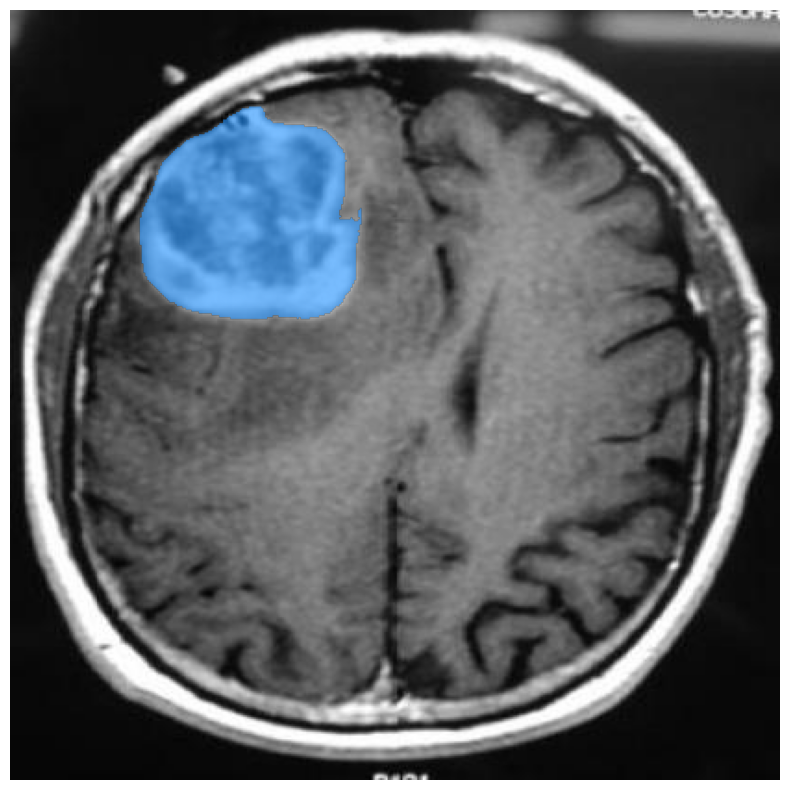

In [26]:
for box in result.boxes:
  class_name = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  x1, y1, x2, y2 = cords

  # Load Model
  import sys
  sys.path.append("..")
  from segment_anything import sam_model_registry, SamPredictor

  sam_checkpoint = "sam_vit_h_4b8939.pth"
  model_type = "vit_h"
  device = "cuda"

  sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
  sam.to(device=device)

  predictor = SamPredictor(sam)
  predictor.set_image(image)

  input_box = np.array(cords)
  print("input_box",input_box)

  # Generate masks with SAM
  # `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format.

  masks, _, _ = predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box[None, :],
      multimask_output=False,
      )

  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  show_mask(masks[0], plt.gca())
  # show_box(input_box, plt.gca())
  plt.axis("off")
  plt.savefig('output.png')
  plt.show()